In [55]:
import pandas as pd

# % matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('notebook')
sns.set_style("whitegrid")
sns.set_palette("Set2")  #colorblind
import matplotlib_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

import plotly.express as px
from plotly.offline import init_notebook_mode


In [8]:
init_notebook_mode()

# 1. Importing the data

In [9]:
file_name = "2022-07-10-courses"
concepts_list = "Input/planetary_boundaries_social_keywords.csv"

data = pd.read_csv(f'./Output/{file_name}.csv')
data.head()

PageID              PageTitle CourseCode  \
0  1032780  Preventive healthcare  MICRO-624   
1  1032780  Preventive healthcare  MICRO-624   
2  1032780  Preventive healthcare  MICRO-624   
3  1032780  Preventive healthcare  MICRO-624   
4  1032780  Preventive healthcare  MICRO-624   

                                         SubjectName SectionCode  Credits  \
0  Wearables and implantables for personalized an...        EDMI      2.0   
1  Wearables and implantables for personalized an...        EDMI      2.0   
2  Wearables and implantables for personalized an...        EDMI      2.0   
3  Wearables and implantables for personalized an...        EDMI      2.0   
4  Wearables and implantables for personalized an...        EDMI      2.0   

  AcademicYear StudyPlanLevelEN                    StudyPlanNameEN  \
0    2021-2022  Doctoral School  Microsystems and Microelectronics   
1    2021-2022  Doctoral School  Microsystems and Microelectronics   
2    2021-2022  Doctoral School  Microsystems and Microelectronics   
3    2021-2022  Doctoral School                      Block Courses   
4    2021-2022  Doctoral School                      Block Courses   

                         EMail  
0               dlocca@cvcl.ch  
1  hendrik.tevaearai@gmail.com  
2       adrian.ionescu@epfl.ch  
3               dlocca@cvcl.ch  
4  hendrik.tevaearai@gmail.com

## 1.1 Spot not found keywords
Cross check which keyword did not correspond to any concept

In [67]:
list(pd.read_csv(concepts_list)["0"])[:10]

['Greenhouse gas',
 'Ozone depletion',
 'nitrogen cycle',
 'Clean water',
 'Land development',
 'Biodiversity loss',
 'High tech material ressources',
 'One Health',
 'Social exclusion',
 'Visions of the future']

In [11]:
df = pd.read_csv(concepts_list)
keywords_look = list(df['0'])
keywords_look = [e.capitalize() for e in keywords_look]

keywords_found = list(data['PageTitle'].unique())

keywords_miss = list(set(keywords_look) - set(keywords_found))

print(len(keywords_look), len(keywords_found), len(keywords_miss))
# Find indexes
indices = [keywords_look.index(x) for x in keywords_miss]
df_out = df.iloc[indices]
df_out.to_csv('./unrecognized_keywords.csv')

344 258 81


In [68]:
keywords_miss[:10]

['Natural hazard management',
 'Chemical pollution',
 'Intra-personal competence',
 'Ecomobility',
 'Food reserves',
 'Artificialisation',
 'Global temperature rise',
 'Extincition even',
 'Role of academic institution',
 'Hazardous substances/chemicals']

In [13]:
data["CourseCode"].nunique()

806

In [14]:
(pd.DataFrame(data["PageTitle"].unique())).to_csv("./Output/obtained_courses_keywords.csv")

### Unique concepts by program type (level)

In [15]:
studyplans = data.groupby(["StudyPlanLevelEN"])["StudyPlanNameEN"].agg(["nunique", "unique"])
#studyplans.to_csv('studyplans.csv', sep=",")
studyplans

nunique                                             unique
StudyPlanLevelEN                                                            
Bachelor Cycle         17  [Chemical Engineering, Environmental Sciences ...
Doctoral School        29  [Microsystems and Microelectronics, Block Cour...
Master Cycle           31  [Digital Humanities, Architecture, Energy Mana...
Minor                  21  [Minor in Engineering for sustainability, Urba...
Propedeutics           14  [Environmental Sciences and Engineering, Human...

# 2. Data processing
## 2.1 Ordering curriculum types by level

In [16]:
data["AcademicYear"] = data["AcademicYear"].astype('category')

data["StudyPlanLevelEN"] = data["StudyPlanLevelEN"].astype('category')
#data["StudyPlanLevelEN"].cat.categories
data["StudyPlanLevelEN"].cat.reorder_categories(
    ['Propedeutics', 'Bachelor Cycle', 'Master Cycle', 'Minor', 'Doctoral School'], inplace=True)

data["StudyPlanNameEN"] = data["StudyPlanNameEN"].astype('category')
#data["StudyPlanNameEN"].cat.categories

C:\Users\mbela\miniconda3\envs\finance37\lib\site-packages\ipykernel_launcher.py:6: FutureWarning:

The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.



## 2.2 Grouping of program sections by faculty

In [17]:
data["SectionCode"] = data["SectionCode"].astype('category')
data["SectionCode"].cat.categories

Index(['AR', 'CGC', 'DH', 'EDAM', 'EDAR', 'EDBB', 'EDCE', 'EDCH', 'EDEE',
       'EDEY', 'EDFI', 'EDIC', 'EDMA', 'EDME', 'EDMI', 'EDMT', 'EDMX', 'EDNE',
       'EDOC-GE', 'EDPO', 'EDPY', 'EL', 'GC', 'GM', 'IF', 'IN', 'MA', 'MT',
       'MTE', 'MX', 'PH', 'PH_NE', 'SC', 'SC_EPFL', 'SHS', 'SIE', 'SV'],
      dtype='object')

In [18]:
data.loc[data["SectionCode"].isin(
    ["EL", "GM", "MT", "MX", "EDEE", "EDME", "EDMI", "EDMX", "EDRS", "EDEY", "EDAM", "EDPO"]), "FacultyCode"] = "STI"
data.loc[data["SectionCode"].isin(["MA", "PH", "CGC", "EDMA", "EDPY", "EDCH"]), "FacultyCode"] = "SB"
data.loc[data["SectionCode"].isin(["AR", "GC", "SIE", "EDAR", "EDCE"]), "FacultyCode"] = "ENAC"
data.loc[data["SectionCode"].isin(["IN", "SC", "EDIC"]), "FacultyCode"] = "IC"
data.loc[data["SectionCode"].isin(["SV", "EDMS", "EDNE", "EDCB", "EDBB"]), "FacultyCode"] = "SV"
data.loc[data["SectionCode"].isin(["MTE", "IF", "EDMT", "EDFI"]), "FacultyCode"] = "CDM"
data.loc[data["SectionCode"].isin(["SHS", "DH", "EDDH"]), "FacultyCode"] = "CDH"
data["FacultyCode"] = data["FacultyCode"].astype('category')
print(data["FacultyCode"].cat.categories)
data["FacultyCode"].cat.reorder_categories(['STI', 'SB', 'IC', 'ENAC', 'SV', 'CDH', 'CDM'], inplace=True)

data.to_csv(f'./Output/{file_name}_cleaned.csv')

Index(['CDH', 'CDM', 'ENAC', 'IC', 'SB', 'STI', 'SV'], dtype='object')


C:\Users\mbela\miniconda3\envs\finance37\lib\site-packages\ipykernel_launcher.py:11: FutureWarning:

The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.



# 3. Results
### Most frequent concepts

In [19]:
coursesbyconcept = data.groupby("PageTitle").agg(["unique", "nunique"])["SubjectName"].sort_values(by="nunique",
                                                                                                   ascending=False)
coursesbyconcept.head()

unique  nunique
PageTitle                                                                   
Renewable energy  [Catalysis for energy storage, Hydraulic struc...      286
Problem solving   [Project in Informatics, Algorithms, nan, Fund...      275
Globalization     [Spatial and Regional Economy, Objets en crise...      166
Carbon dioxide    [Catalysis for emission control and energy pro...      102
Sustainability    [Studio BA3 (Rey), Studio MA1 (Graf), Studio M...      101

## 3.1 Curriculum
### 3.1.1 Courses per curriculum level

In [20]:
countcourses = data.groupby("StudyPlanLevelEN")["CourseCode"].agg(["nunique"])
countcourses

nunique
StudyPlanLevelEN         
Propedeutics           69
Bachelor Cycle        248
Master Cycle          436
Minor                 252
Doctoral School       159

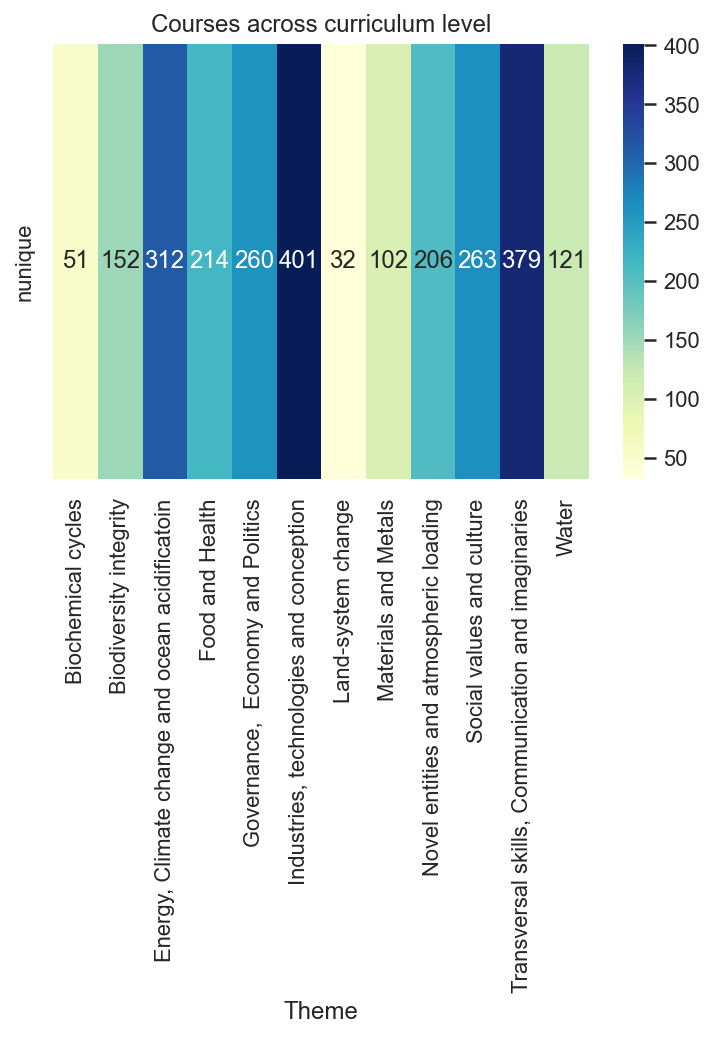

In [56]:
ax = sns.heatmap(countcourses.transpose(), annot=True, cmap="YlGnBu", annot_kws={"size": 12},
                 fmt='d');  #, cbar_kws = dict(use_gridspec=False,location="top")
ax.set_title('Courses across curriculum level');

### 3.1.2 Map courses over curriculum


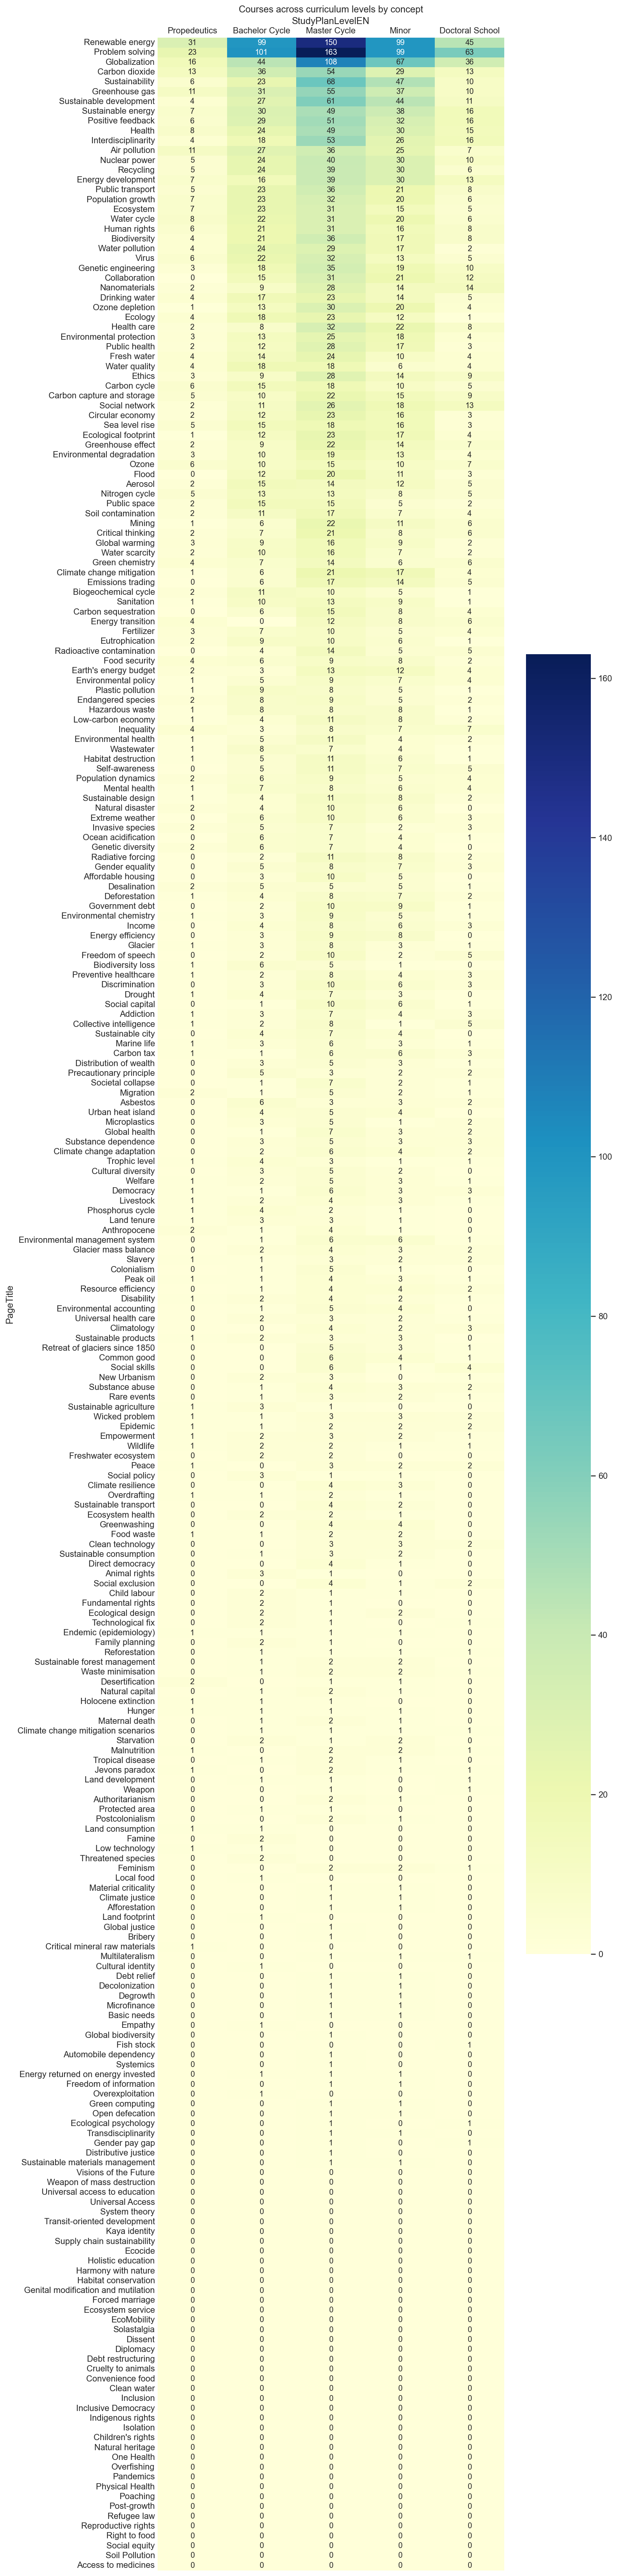

In [57]:
#list(data["StudyPlanLevelEN"].cat.categories)
#values=data['CourseCode'], aggfunc="nunique",
ct_courses = pd.crosstab(index=data["PageTitle"],
                         columns=data['StudyPlanLevelEN'],
                         values=data['CourseCode'], aggfunc="nunique",
                         dropna=False,
                         margins=True)  #.sort_values(by=["Master Cycle", "Bachelor Cycle"], ascending=False)

ct_courses.sort_values(by="All", ascending=False, inplace=True)
ct_courses.drop("All", axis=0, inplace=True)
ct_courses.drop("All", axis=1, inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(10, 60))

ax = sns.heatmap(ct_courses, annot=True, cmap="YlGnBu", annot_kws={"size": 10},
                 fmt='d');  #, cbar_kws = dict(use_gridspec=False,location="top")

ax.set_title('Courses across curriculum levels by concept')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.tick_params(axis=u'both', which=u'both', length=0)

plt.show()

In [23]:
countteachers = data.groupby("EMail").agg(["unique"])[["CourseCode", "SubjectName", "PageTitle"]]
countteachers.head()

CourseCode  \
                                  unique   
EMail                                      
Cyril.Matthey-Doret@unil.ch    [COM-490]   
Geraldine.Marks@unige.ch       [BIO-455]   
Kim-Anne.Le@rdls.nestle.com    [BIO-441]   
Nenad.marjanovic@csem.ch     [MICRO-505]   
Olivier.Verscheure@epfl.ch     [COM-490]   

                                                                SubjectName  \
                                                                     unique   
EMail                                                                         
Cyril.Matthey-Doret@unil.ch  [Large-scale data science for real-world data]   
Geraldine.Marks@unige.ch                   [Introduction to law and ethics]   
Kim-Anne.Le@rdls.nestle.com           [Nutrition: from molecules to health]   
Nenad.marjanovic@csem.ch                  [Organic and printed electronics]   
Olivier.Verscheure@epfl.ch   [Large-scale data science for real-world data]   

                                                                     PageTitle  
                                                                        unique  
EMail                                                                           
Cyril.Matthey-Doret@unil.ch  [Problem solving, Interdisciplinarity, Public ...  
Geraldine.Marks@unige.ch     [Ethics, Preventive healthcare, Air pollution,...  
Kim-Anne.Le@rdls.nestle.com                      [Interdisciplinarity, Health]  
Nenad.marjanovic@csem.ch     [Energy development, Sustainability, Ozone, Re...  
Olivier.Verscheure@epfl.ch   [Problem solving, Interdisciplinarity, Public ...

## 3.2 Section / Faculty

In [24]:
countcourses = data.groupby("SectionCode")["CourseCode"].agg(["nunique"]).sort_values(by="nunique", ascending=False)
countcourses.head()

nunique
SectionCode         
PH                68
AR                66
GM                60
MA                60
SV                55

### 3.2.1 Courses across faculty by concept

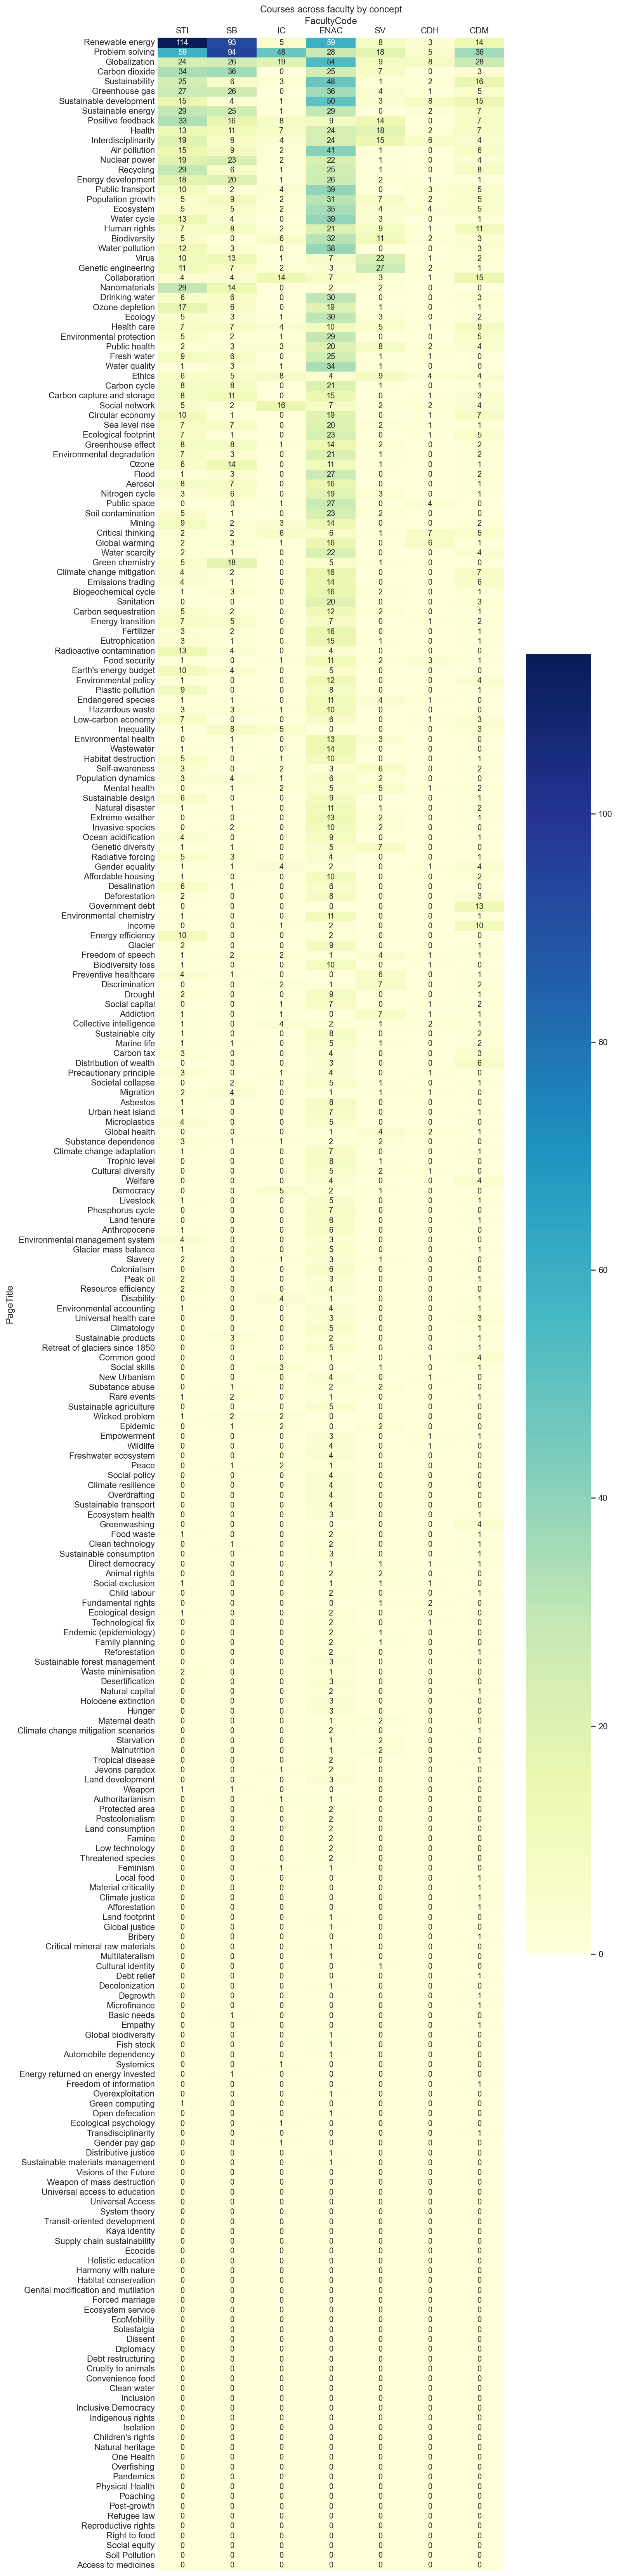

In [58]:
ct_courses = pd.crosstab(index=data["PageTitle"],
                         columns=data['FacultyCode'],
                         values=data['CourseCode'], aggfunc="nunique",
                         dropna=False, margins=True)

ct_courses.sort_values(by="All", ascending=False, inplace=True)
ct_courses.drop("All", axis=0, inplace=True)
ct_courses.drop("All", axis=1, inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(10, 60))

ax = sns.heatmap(ct_courses, annot=True, cmap="YlGnBu", annot_kws={"size": 10},
                 fmt='d');  #, cbar_kws = dict(use_gridspec=False,location="top")

ax.set_title('Courses across faculty by concept')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.tick_params(axis=u'both', which=u'both', length=0)

plt.show()

### Extract most frequent unique concepts

In [26]:
countcourses = data.groupby("PageTitle")["CourseCode"].agg(["nunique"]).sort_values(by="nunique", ascending=False)
countcourses.head(10)

nunique
PageTitle                       
Renewable energy             297
Problem solving              290
Globalization                169
Carbon dioxide               105
Sustainability               101
Greenhouse gas                99
Sustainable development       96
Sustainable energy            93
Positive feedback             87
Health                        83

## 3.3 Map by factulty and curriculum level

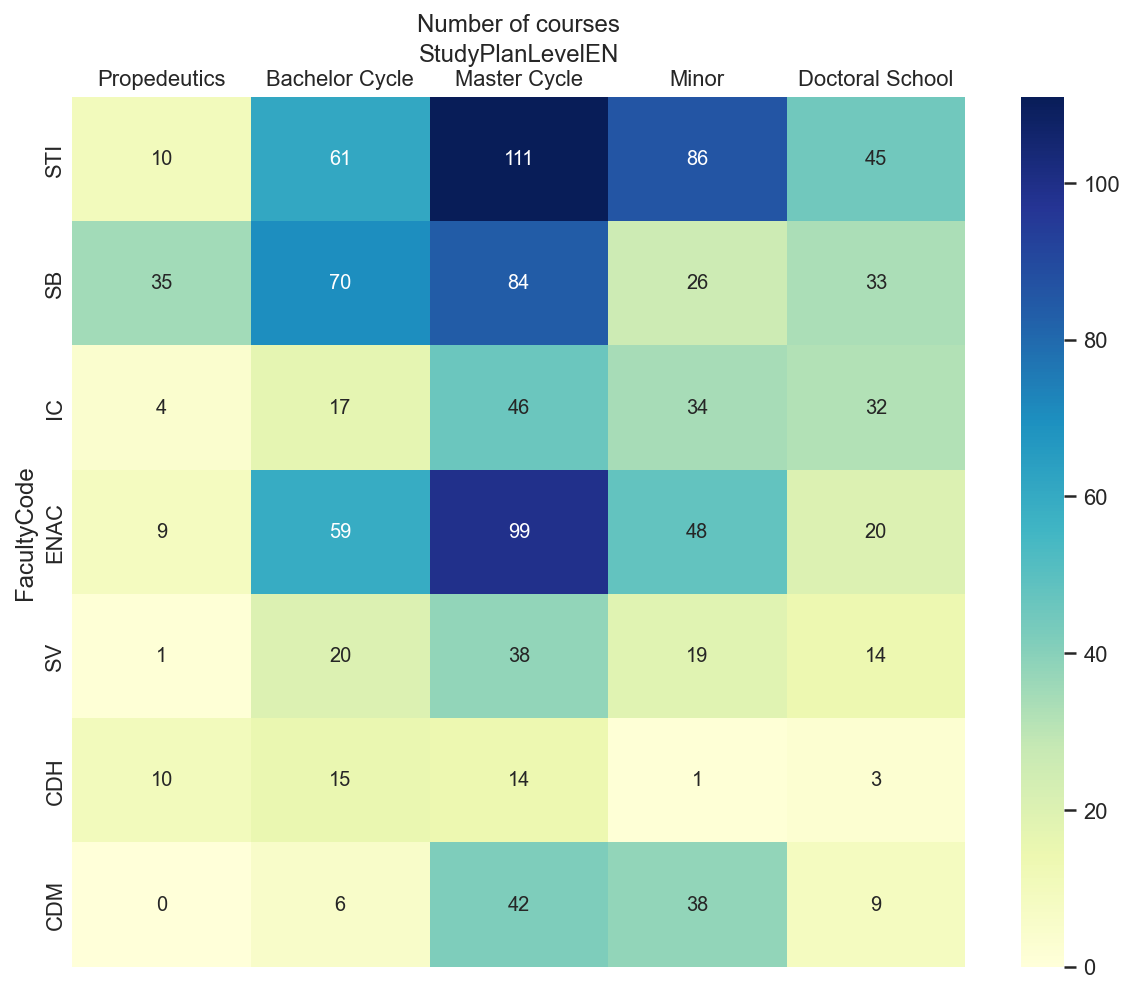

In [59]:
ct_courses_N = pd.crosstab(index=data['FacultyCode'],
                           columns=data['StudyPlanLevelEN'],
                           values=data['CourseCode'], aggfunc="nunique",
                           dropna=False, margins=True)
#ct_courses.sort_values(by="All", ascending=False, inplace=True)
ct_courses_N.drop("All", axis=0, inplace=True)
ct_courses_N.drop("All", axis=1, inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax = sns.heatmap(ct_courses_N, annot=True, cmap="YlGnBu", annot_kws={"size": 10},
                 fmt='g');  #, vmax=40, cbar_kws = dict(use_gridspec=False,location="top")

ax.set_title('Number of courses')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.tick_params(axis=u'both', which=u'both', length=0)

plt.show()

In [28]:
# ISSUE - we have duplicate courses!
# Some courses are offered at several levels, which we have to keep
# But we have to remove the duplicates due to other factors (concepts and lecturers mainly)

ct_courses_CN1 = pd.crosstab(index=data['FacultyCode'],
                             columns=data['StudyPlanLevelEN'],
                             values=data['CourseCode'], aggfunc="nunique",
                             dropna=False, margins=True).round(2)

# First we remove the duplicates taking into account the level in the study plan
data_unique = data.drop_duplicates(subset=["CourseCode", "StudyPlanLevelEN"])
# Then we average the credits
ct_courses_CN2 = pd.crosstab(index=data_unique['FacultyCode'],
                             columns=data_unique['StudyPlanLevelEN'],
                             values=data_unique['Credits'], aggfunc="mean",
                             dropna=False, margins=True).round(2)

ct_courses_CN = pd.concat([ct_courses_CN1, ct_courses_CN2], axis=1, keys=["count", "mean"])

# Pretty labels for rows and columns
ct_courses_CN.rename(columns={'count': 'Number of unique courses', 'mean': 'Average number of credits'}, inplace=True)
ct_courses_CN.rename_axis(columns={'StudyPlanLevelEN': 'Level of study plan'}, inplace=True)
ct_courses_CN.rename_axis(index={'FacultyCode': 'Faculty'}, inplace=True)

# Orange color palette for number of courses
orange = sns.color_palette("YlOrBr", as_cmap=True)
# Blue color palette for average credits, with white for NaN values
blue = sns.color_palette("Blues", as_cmap=True).copy()
blue.set_bad(color='white')

# getting the list of rows in the crosstab
rows = ct_courses_CN.index.get_level_values(0)
# getting the list of second level colunms (which are duplicate)
cols0 = ct_courses_CN.columns.get_level_values(0).unique()
# getting the list of second level colunms (which are duplicate)
cols1 = ct_courses_CN.columns.get_level_values(1).unique()

# Getting rid of unecessary numbers
pd.set_option('precision', 2)

# Styling the table
ct_courses_CN.style.set_table_styles([dict(selector='th', props=[('text-align', 'left')])]).background_gradient(subset=pd.IndexSlice[rows[:-1], pd.IndexSlice[cols0[0], cols1[:-1]]], cmap=orange, vmax=100).background_gradient(subset=pd.IndexSlice[rows[:-1], pd.IndexSlice[cols0[1], cols1[:-1]]], cmap=blue, vmax=6)

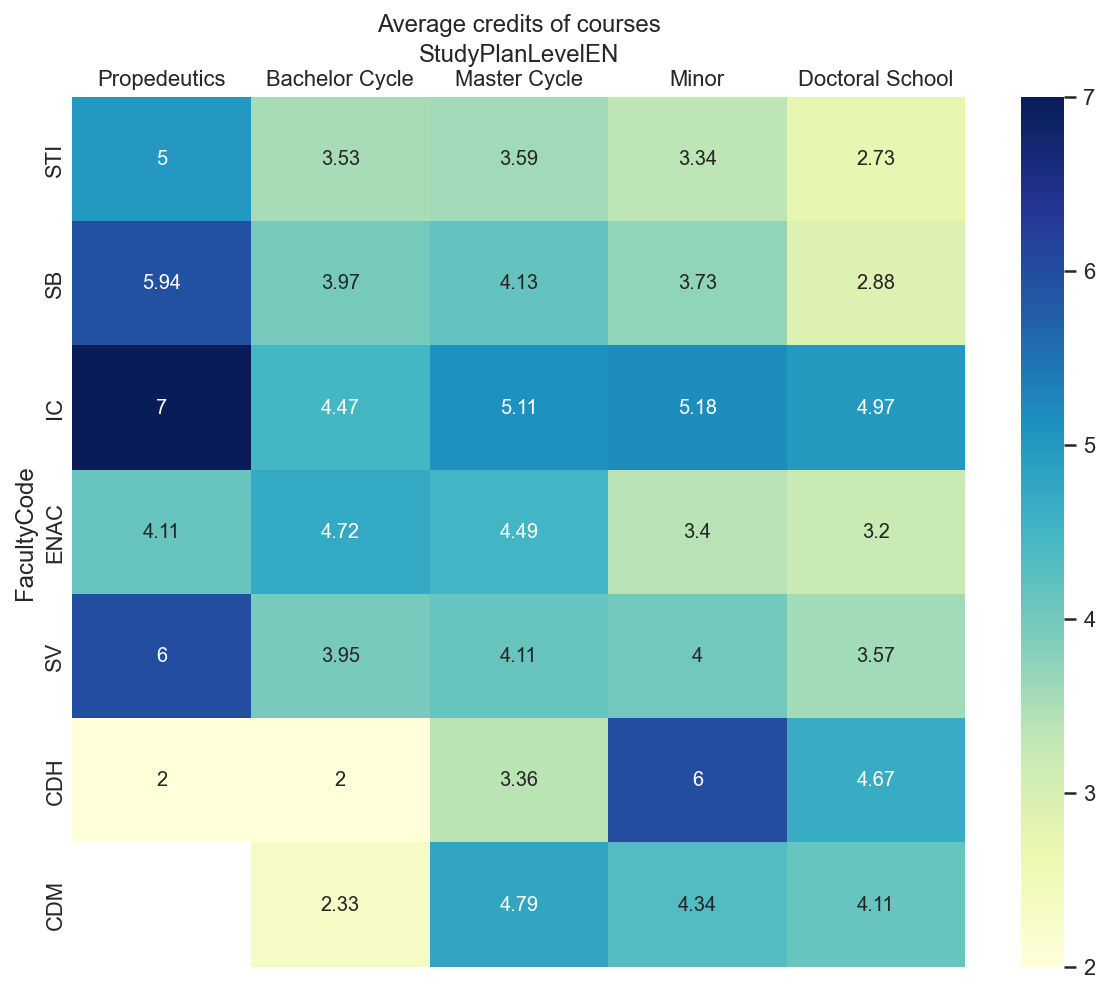

In [60]:
ct_courses_C = pd.crosstab(index=data_unique['FacultyCode'],
                           columns=data_unique['StudyPlanLevelEN'],
                           values=data_unique['Credits'], aggfunc="mean",
                           dropna=False, margins=True).round(2)

ct_courses_C.drop("All", axis=0, inplace=True)
ct_courses_C.drop("All", axis=1, inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax = sns.heatmap(ct_courses_C, annot=True, cmap="YlGnBu", annot_kws={"size": 10},
                 fmt='g');  #, vmax=40, cbar_kws = dict(use_gridspec=False,location="top")

ax.set_title('Average credits of courses')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.tick_params(axis=u'both', which=u'both', length=0)

plt.show()

In [30]:
data.loc[(data["FacultyCode"].isin(["CDH"])) & (data["StudyPlanLevelEN"].isin(["Doctoral School"]))].drop_duplicates(
    subset=["CourseCode", 'StudyPlanLevelEN'])

PageID            PageTitle CourseCode  \
50    18413531       Sustainability     DH-405   
3087     12383  Genetic engineering     DH-500   
4369   1467948      Problem solving     DH-406   

                            SubjectName SectionCode  Credits AcademicYear  \
50    Foundations of digital humanities          DH      6.0    2021-2022   
3087         Computational Social Media          DH      4.0    2021-2022   
4369            Machine learning for DH          DH      4.0    2021-2022   

     StudyPlanLevelEN     StudyPlanNameEN                        EMail  \
50    Doctoral School   Learning Sciences      frederic.kaplan@epfl.ch   
3087  Doctoral School  Digital humanities  daniel.gatica-perez@epfl.ch   
4369  Doctoral School  Digital humanities     mathieu.salzmann@epfl.ch   

     FacultyCode  
50           CDH  
3087         CDH  
4369         CDH

In [32]:
data.loc[
    (data['Credits'] >= 6) & (data["FacultyCode"].isin(["STI"])) & (data["StudyPlanLevelEN"].isin(["Propedeutics"]))].drop_duplicates(subset=["CourseCode", 'StudyPlanLevelEN'])

PageID         PageTitle CourseCode  \
1193   1467948   Problem solving     ME-104   
2740  10934212     Air pollution    MSE-171   
8636     25784  Renewable energy     EE-100   
8934     25784  Renewable energy    MSE-100   

                                      SubjectName SectionCode  Credits  \
1193         Introduction to structural mechanics          GM      6.0   
2740                                    Materials          MX      6.0   
8636  Electrical engineering science & technology          EL      6.0   
8934                          Materials structure          MX      6.0   

     AcademicYear StudyPlanLevelEN                         StudyPlanNameEN  \
1193    2021-2022     Propedeutics                  Mechanical Engineering   
2740    2021-2022     Propedeutics                       Civil Engineering   
8636    2021-2022     Propedeutics  Electrical and Electronics Engineering   
8934    2021-2022     Propedeutics       Materials Science and Engineering   

                               EMail FacultyCode  
1193              pedro.reis@epfl.ch         STI  
2740       jean-marie.drezet@epfl.ch         STI  
8636            roberto.zoia@epfl.ch         STI  
8934  pierre-etienne.bourban@epfl.ch         STI

In [33]:
data.loc[(data['Credits'] >= 6) & (data["FacultyCode"].isin(["IC"])) & (
    data["StudyPlanLevelEN"].isin(["Propedeutics"]))].drop_duplicates(subset=["CourseCode"])

PageID        PageTitle CourseCode  \
3733  1467948  Problem solving  CS-119(a)   
3866  1467948  Problem solving     CS-101   
3933  1467948  Problem solving  CS-119(c)   
4505  1467948  Problem solving     CS-108   

                                            SubjectName SectionCode  Credits  \
3733            Information, Computation, Communication          IN      6.0   
3866  Advanced information, computation, communicati...          IN      7.0   
3933            Information, Computation, Communication          IN      6.0   
4505            Practice of object-oriented programming          IN      9.0   

     AcademicYear StudyPlanLevelEN                         StudyPlanNameEN  \
3733    2021-2022     Propedeutics                  Mechanical Engineering   
3866    2021-2022     Propedeutics                   Communication Systems   
3933    2021-2022     Propedeutics  Electrical and Electronics Engineering   
4505    2021-2022     Propedeutics                   Communication Systems   

                        EMail FacultyCode  
3733  olivier.leveque@epfl.ch          IC  
3866      karl.aberer@epfl.ch          IC  
3933     ronan.boulic@epfl.ch          IC  
4505    michel.schinz@epfl.ch          IC

In [34]:
data.loc[(data['Credits'] >= 6) & (data["FacultyCode"].isin(["STI"])) & (
    data["StudyPlanLevelEN"].isin(["Propedeutics"]))].drop_duplicates(subset=["CourseCode"])

PageID         PageTitle CourseCode  \
1193   1467948   Problem solving     ME-104   
2740  10934212     Air pollution    MSE-171   
8636     25784  Renewable energy     EE-100   
8934     25784  Renewable energy    MSE-100   

                                      SubjectName SectionCode  Credits  \
1193         Introduction to structural mechanics          GM      6.0   
2740                                    Materials          MX      6.0   
8636  Electrical engineering science & technology          EL      6.0   
8934                          Materials structure          MX      6.0   

     AcademicYear StudyPlanLevelEN                         StudyPlanNameEN  \
1193    2021-2022     Propedeutics                  Mechanical Engineering   
2740    2021-2022     Propedeutics                       Civil Engineering   
8636    2021-2022     Propedeutics  Electrical and Electronics Engineering   
8934    2021-2022     Propedeutics       Materials Science and Engineering   

                               EMail FacultyCode  
1193              pedro.reis@epfl.ch         STI  
2740       jean-marie.drezet@epfl.ch         STI  
8636            roberto.zoia@epfl.ch         STI  
8934  pierre-etienne.bourban@epfl.ch         STI

In [35]:
data.loc[(data['Credits'] >= 6) & (data["FacultyCode"].isin(["CDM"])) & (
    data["StudyPlanLevelEN"].isin(["Master Cycle"]))].drop_duplicates(subset=["CourseCode"]).sort_values(
    by="FacultyCode")

PageID                PageTitle CourseCode  \
986    865678            Social skills    MGT-599   
1291    15201      Interdisciplinarity    MGT-555   
2572  1055890       Sustainable energy    FIN-405   
2733  1055890       Sustainable energy    FIN-401   
3780  1467948          Problem solving    FIN-415   
4178  1467948          Problem solving    FIN-404   
4470  1467948          Problem solving    FIN-407   
9974    29501  Sustainable development    FIN-416   

                                       SubjectName SectionCode  Credits  \
986     Master project in Management of Technology         MTE     30.0   
1291  Innovation & entrepreneurship in engineering         MTE     10.0   
2572                                   Investments          IF      6.0   
2733                       Introduction to finance          IF      6.0   
3780                           Stochastic calculus          IF      6.0   
4178                                   Derivatives          IF      6.0   
4470                        Financial econometrics          IF      6.0   
9974          Interest rate and credit risk models          IF      6.0   

     AcademicYear StudyPlanLevelEN  \
986     2021-2022     Master Cycle   
1291    2021-2022     Master Cycle   
2572    2021-2022     Master Cycle   
2733    2021-2022     Master Cycle   
3780    2021-2022     Master Cycle   
4178    2021-2022     Master Cycle   
4470    2021-2022     Master Cycle   
9974    2021-2022     Master Cycle   

                                  StudyPlanNameEN  \
986   Management, Technology and Entrepreneurship   
1291       Electrical and Electronics Engineering   
2572                        Financial engineering   
2733                        Financial engineering   
3780                        Financial engineering   
4178                        Financial engineering   
4470                        Financial engineering   
9974                        Financial engineering   

                               EMail FacultyCode  
986                              NaN         CDM  
1291       veronique.michaud@epfl.ch         CDM  
2572  pierre.collin-dufresne@epfl.ch         CDM  
2733          erwan.morellec@epfl.ch         CDM  
3780          semyon.malamud@epfl.ch         CDM  
4178        julien.hugonnier@epfl.ch         CDM  
4470           elise.gourier@epfl.ch         CDM  
9974         damir.filipovic@epfl.ch         CDM

In [36]:
data.loc[(data['Credits'] >= 6) & (data["FacultyCode"].isin(["SV"]))].drop_duplicates(subset=["CourseCode"])

PageID            PageTitle  CourseCode  \
3018  11724761        Trophic level     BIO-109   
3164     12383  Genetic engineering  BIOENG-110   

                                 SubjectName SectionCode  Credits  \
3018  Introduction to life sciences (for IC)          SV      6.0   
3164                         General Biology          SV      6.0   

     AcademicYear StudyPlanLevelEN            StudyPlanNameEN  \
3018    2021-2022   Bachelor Cycle      Communication Systems   
3164    2021-2022     Propedeutics  Life Sciences Engineering   

                        EMail FacultyCode  
3018  romain.zufferey@epfl.ch          SV  
3164    freddy.radtke@epfl.ch          SV

In [37]:
data[(data["StudyPlanLevelEN"] == "Propedeutics") & (data["FacultyCode"] == "STI")]

PageID              PageTitle  CourseCode  \
1193    1467948        Problem solving      ME-104   
2452    1032780  Preventive healthcare  MSE-101(a)   
2514    1055890     Sustainable energy      ME-104   
2682    1055890     Sustainable energy      EE-106   
2740   10934212          Air pollution     MSE-171   
...         ...                    ...         ...   
17373      9630                Ecology     MSE-171   
17374      9630                Ecology     MSE-171   
17375      9630                Ecology     MSE-171   
17376      9630                Ecology     MSE-171   
17377      9630                Ecology     MSE-171   

                                       SubjectName SectionCode  Credits  \
1193          Introduction to structural mechanics          GM      6.0   
2452        Materials:from chemistry to properties          MX      5.0   
2514          Introduction to structural mechanics          GM      6.0   
2682   Electrical engineering science & technology          EL      5.0   
2740                                     Materials          MX      6.0   
...                                            ...         ...      ...   
17373                                    Materials          MX      6.0   
17374                                    Materials          MX      6.0   
17375                                    Materials          MX      6.0   
17376                                    Materials          MX      6.0   
17377                                    Materials          MX      6.0   

      AcademicYear StudyPlanLevelEN         StudyPlanNameEN  \
1193     2021-2022     Propedeutics  Mechanical Engineering   
2452     2021-2022     Propedeutics  Mechanical Engineering   
2514     2021-2022     Propedeutics  Mechanical Engineering   
2682     2021-2022     Propedeutics  Mechanical Engineering   
2740     2021-2022     Propedeutics       Civil Engineering   
...            ...              ...                     ...   
17373    2021-2022     Propedeutics       Civil Engineering   
17374    2021-2022     Propedeutics       Civil Engineering   
17375    2021-2022     Propedeutics       Civil Engineering   
17376    2021-2022     Propedeutics       Civil Engineering   
17377    2021-2022     Propedeutics       Civil Engineering   

                              EMail FacultyCode  
1193             pedro.reis@epfl.ch         STI  
2452      veronique.michaud@epfl.ch         STI  
2514             pedro.reis@epfl.ch         STI  
2682           roberto.zoia@epfl.ch         STI  
2740      jean-marie.drezet@epfl.ch         STI  
...                             ...         ...  
17373     jean-marie.drezet@epfl.ch         STI  
17374        cyril.denereaz@epfl.ch         STI  
17375       karen.scrivener@epfl.ch         STI  
17376  lionel.sofia-gabrion@epfl.ch         STI  
17377      emmanuelle.boehm@epfl.ch         STI  

[111 rows x 11 columns]

In [38]:
data.loc[(data['Credits'] >= 8)].drop_duplicates(subset=["CourseCode"])

PageID                PageTitle   CourseCode  \
44     18413531           Sustainability    AR-401(b)   
45     18413531           Sustainability    AR-402(n)   
158       25784         Renewable energy     PHYS-211   
514       15201      Interdisciplinarity       ME-401   
515       15201      Interdisciplinarity       ME-402   
986      865678            Social skills      MGT-599   
987      865678            Social skills     PHYS-490   
1020       9258                   Ethics      ENV-596   
1112      12383      Genetic engineering    AR-401(j)   
1114      12383      Genetic engineering    AR-402(j)   
1122      12383      Genetic engineering    MICRO-406   
1291      15201      Interdisciplinarity      MGT-555   
1431     254328             Public space    AR-301(c)   
1432     254328             Public space    AR-302(c)   
1451      25784         Renewable energy    AR-302(a)   
1581   26162030         Public transport    AR-202(g)   
1658      29501  Sustainable development    AR-402(b)   
1778   31666505         Circular economy    AR-301(d)   
1980      45802           Social capital    AR-401(a)   
1981      45802           Social capital    AR-402(a)   
2329     940606        Population growth    AR-402(f)   
2341       9630                  Ecology    AR-402(y)   
2380    1002744    Sustainable transport    AR-401(o)   
3559      13831             Human rights     PHYS-100   
3687     144219                 Wildlife    AR-301(o)   
4505    1467948          Problem solving       CS-108   
5415   18413531           Sustainability    AR-401(m)   
5929   19167679                    Virus       CH-110   
13401     46313            Globalization  MATH-105(a)   
16934      9258                   Ethics     MATH-510   

                                        SubjectName SectionCode  Credits  \
44                                Studio MA1 (Graf)          AR     13.0   
45                            Studio MA2 (Lapierre)          AR     13.0   
158                                 Physics lab IIb          PH      8.0   
514                Mechanical engineering project I          GM     10.0   
515               Mechanical engineering project II          GM     10.0   
986      Master project in Management of Technology         MTE     30.0   
987            Elective project nuclear engineering       PH_NE      8.0   
1020                                 Design project         SIE     10.0   
1112                               Studio MA1 (FAR)          AR     13.0   
1114                               Studio MA2 (FAR)          AR     13.0   
1122          Products design & systems engineering          MT     10.0   
1291   Innovation & entrepreneurship in engineering         MTE     10.0   
1431                        Studio BA5 (Ortelli L.)          AR     10.0   
1432                        Studio BA6 (Ortelli L.)          AR     10.0   
1451                            Studio BA6 (Viganò)          AR     10.0   
1581                               Studio BA4 (Rey)          AR     20.0   
1658                              Studio MA2 (Graf)          AR     13.0   
1778                  Studio BA5 (Fröhlich M. & A.)          AR     10.0   
1980                            Studio MA1 (Vigano)          AR     13.0   
1981                            Studio MA2 (Vigano)          AR     13.0   
2329                               Studio MA2 (FAR)          AR     13.0   
2341                             Studio MA2 (Huang)          AR     13.0   
2380                              Studio MA1 (elii)          AR     13.0   
3559                 Advanced physics I (mechanics)          PH      8.0   
3687                              Studio BA5 (elii)          AR     10.0   
4505        Practice of object-oriented programming          IN      9.0   
5415                    Studio MA1 (Gay and Menzel)          AR     13.0   
5929                   Advanced general chemistry I         CGC      9.0   
13401                          Advanc

In [39]:
data[data["CourseCode"] == "MICRO-428"]

PageID                  PageTitle CourseCode SubjectName SectionCode  \
4705   1467948            Problem solving  MICRO-428   Metrology          MT   
4706   1467948            Problem solving  MICRO-428   Metrology          MT   
4707   1467948            Problem solving  MICRO-428   Metrology          MT   
6524     20381                     Mining  MICRO-428   Metrology          MT   
6525     20381                     Mining  MICRO-428   Metrology          MT   
6526     20381                     Mining  MICRO-428   Metrology          MT   
7180    213354          Positive feedback  MICRO-428   Metrology          MT   
7181    213354          Positive feedback  MICRO-428   Metrology          MT   
7182    213354          Positive feedback  MICRO-428   Metrology          MT   
7883     22153              Nuclear power  MICRO-428   Metrology          MT   
7884     22153              Nuclear power  MICRO-428   Metrology          MT   
7885     22153              Nuclear power  MICRO-428   Metrology          MT   
9088     25784           Renewable energy  MICRO-428   Metrology          MT   
9089     25784           Renewable energy  MICRO-428   Metrology          MT   
9090     25784           Renewable energy  MICRO-428   Metrology          MT   
10762   312266            Water pollution  MICRO-428   Metrology          MT   
10763   312266            Water pollution  MICRO-428   Metrology          MT   
10764   312266            Water pollution  MICRO-428   Metrology          MT   
13590    46313              Globalization  MICRO-428   Metrology          MT   
13591    46313              Globalization  MICRO-428   Metrology          MT   
13592    46313              Globalization  MICRO-428   Metrology          MT   
14559   533487         Energy development  MICRO-428   Metrology          MT   
14560   533487         Energy development  MICRO-428   Metrology          MT   
14561   533487         Energy development  MICRO-428   Metrology          MT   
15153     5906             Carbon dioxide  MICRO-428   Metrology          MT   
15154     5906             Carbon dioxide  MICRO-428   Metrology          MT   
15155     5906             Carbon dioxide  MICRO-428   Metrology          MT   
15402   621749  Radioactive contamination  MICRO-428   Metrology          MT   
15403   621749  Radioactive contamination  MICRO-428   Metrology          MT   
15404   621749  Radioactive contamination  MICRO-428   Metrology          MT   
16695   868108              Nanomaterials  MICRO-428   Metrology          MT   
16696   868108              Nanomaterials  MICRO-428   Metrology          MT   
16697   868108              Nanomaterials  MICRO-428   Metrology          MT   

       Credits AcademicYear StudyPlanLevelEN   StudyPlanNameEN  \
4705       3.0    2021-2022     Master Cycle  Microengineering   
4706       3.0    2021-2022     Master Cycle  Microengineering   
4707       3.0    2021-2022     Master Cycle  Microengineering   
6524       3.0    2021-2022     Master Cycle  Microengineering   
6525       3.0    2021-2022     Master Cycle  Microengineering   
6526       3.0    2021-2022     Master Cycle  Microengineering   
7180       3.0    2021-2022     Master Cycle  Microengineering   
7181       3.0    2021-2022     Master Cycle  Microengineering   
7182       3.0    2021-2022     Master Cycle  Microengineering   
7883       3.0    2021-2022     Master Cycle  Microengineering   
7884       3.0    2021-2022     Master Cycle  Microengineering   
7885       3.0    2021-2022     Master Cycle  Microengineering   
9088       3.0    2021-2022     Master Cycle  Microengineering   
9089       3.0    2021-2022     Master Cycle  Microengineering   
9090       3.0    2021-2022     Master Cycle  Microengineering   
10762      3.0    2021-2022     Master Cycle  Microengineering   
10763      3.0    2021-2022     Master Cycle  Microengineering   
10764      3.0    2021-2022     Master Cycle  Microengineering   
13590      3.0    2021-2022     M

In [40]:
data[(data["StudyPlanLevelEN"] == "Propedeutics") & (data["FacultyCode"] == "CDH")]

PageID                PageTitle  CourseCode  \
1084   1055890       Sustainable energy  HUM-123(b)   
1085   1055890       Sustainable energy  HUM-123(b)   
1279     15201      Interdisciplinarity  HUM-122(a)   
1280     15201      Interdisciplinarity  HUM-122(a)   
1281     15201      Interdisciplinarity  HUM-122(b)   
1282     15201      Interdisciplinarity  HUM-122(b)   
1283     15201      Interdisciplinarity  HUM-124(a)   
1284     15201      Interdisciplinarity  HUM-124(a)   
1370  20756850  Collective intelligence  HUM-122(b)   
1371  20756850  Collective intelligence  HUM-122(b)   
1389    216361            Food security  HUM-120(a)   
1390    216361            Food security  HUM-120(a)   
1391    216361            Food security  HUM-120(a)   
1392    216361            Food security  HUM-120(b)   
1393    216361            Food security  HUM-120(b)   
1527     25784         Renewable energy  HUM-123(a)   
1528     25784         Renewable energy  HUM-123(a)   
1529     25784         Renewable energy  HUM-123(b)   
1530     25784         Renewable energy  HUM-123(b)   
1609  26162030         Public transport  HUM-124(a)   
1610  26162030         Public transport  HUM-124(a)   
1611  26162030         Public transport  HUM-124(b)   
1612  26162030         Public transport  HUM-124(b)   
1702     29501  Sustainable development  HUM-123(a)   
1703     29501  Sustainable development  HUM-123(a)   
1911  39208945        Energy transition  HUM-123(b)   
1912  39208945        Energy transition  HUM-123(b)   
2015     46313            Globalization  HUM-121(a)   
2016     46313            Globalization  HUM-121(a)   
2017     46313            Globalization  HUM-121(b)   
2018     46313            Globalization  HUM-121(b)   
2019     46313            Globalization  HUM-124(a)   
2020     46313            Globalization  HUM-124(a)   
2087   5042951           Global warming  HUM-121(b)   
2088   5042951           Global warming  HUM-121(b)   
2089   5042951           Global warming  HUM-123(a)   
2090   5042951           Global warming  HUM-123(a)   
2171    533487       Energy development  HUM-123(b)   
2172    533487       Energy development  HUM-123(b)   
2261     80381                   Health  HUM-120(b)   
2262     80381                   Health  HUM-120(b)   
2290   8941842       Low-carbon economy  HUM-123(b)   
2291   8941842       Low-carbon economy  HUM-123(b)   
2308      9258                   Ethics  HUM-122(a)   
2309      9258                   Ethics  HUM-122(a)   
2358      9632                Ecosystem  HUM-121(a)   
2359      9632                Ecosystem  HUM-121(a)   
2360      9632                Ecosystem  HUM-121(b)   
2361      9632                Ecosystem  HUM-121(b)   

                         SubjectName SectionCode  Credits AcademicYear  \
1084         Global issues: energy B         SHS      2.0    2021-2022   
1085         Global issues: energy B         SHS      2.0    2021-2022   
1279  Global issues: communication A         SHS      2.0    2021-2022   
1280  Global issues: communication A         SHS      2.0    2021-2022   
1281  Global issues: communication B         SHS      2.0    2021-2022   
1282  Global issues: communication B         SHS      2.0    2021-2022   
1283       Global issues: mobility A         SHS      2.0    2021-2022   
1284       Global issues: mobility A         SHS      2.0    2021-2022   
1370  Global issues: communication B         SHS      2.0    2021-2022   
1371  Global issues: communication B         SHS      2.0    2021-2022   
1389           Global issues: food A         SHS      2.0    2021-2022   
1390           Global issues: food A         SHS      2.0    2021-2022   
1391           Global issues: food A         SHS      2.0    2021-2022   
1392           Global issues: food B         SHS      2.0    2021-2022   
1393           Global issues: food B         SHS      2.0    2021-2022   
1527         Global issues: energy A         SHS      2.0    2021-2022   

## 3.4 Categories & Themes of concepts

In [41]:
concepts_df = pd.read_json("Input/planetary_boundaries_social_keywords.json").explode("Key words")
concepts_df.head()

Categories                                           Theme  \
0  Planetary boundaries  Energy, Climate change and ocean acidificatoin   
0  Planetary boundaries  Energy, Climate change and ocean acidificatoin   
0  Planetary boundaries  Energy, Climate change and ocean acidificatoin   
0  Planetary boundaries  Energy, Climate change and ocean acidificatoin   
0  Planetary boundaries  Energy, Climate change and ocean acidificatoin   

                       Key words  
0                 Greenhouse gas  
0                 Carbon dioxide  
0            Ocean acidification  
0  thermodynamical laws (impact)  
0             Energy development

In [42]:
concepts_df["Key words"] = concepts_df["Key words"].apply(lambda keyword: keyword[0].upper() + keyword[1:])

In [43]:
categorical_data = data.merge(concepts_df, left_on="PageTitle", right_on="Key words", how="left")

In [44]:
planetary_boundaries = ["Energy, Climate change and ocean acidificatoin", "Novel entities and atmospheric loading",
                        "Biochemical cycles", "Water", "Land-system change", "Biodiversity integrity",
                        "Materials and Metals"]
social_foundations = ["Food and Health", "Social values and culture",
                      "Transversal skills, Communication and imaginaries", "Industries, technologies and conception",
                      "Governance,  Economy and Politics"]

In [45]:
countcourses = categorical_data.groupby("Theme")["CourseCode"].agg(["nunique"])
countcourses

nunique
Theme                                                     
Biochemical cycles                                      51
Biodiversity integrity                                 152
Energy, Climate change and ocean acidificatoin         312
Food and Health                                        214
Governance,  Economy and Politics                      260
Industries, technologies and conception                401
Land-system change                                      32
Materials and Metals                                   102
Novel entities and atmospheric loading                 206
Social values and culture                              263
Transversal skills, Communication and imaginaries      379
Water                                                  121

### 3.4.1 Unique courses per planetary boundary theme

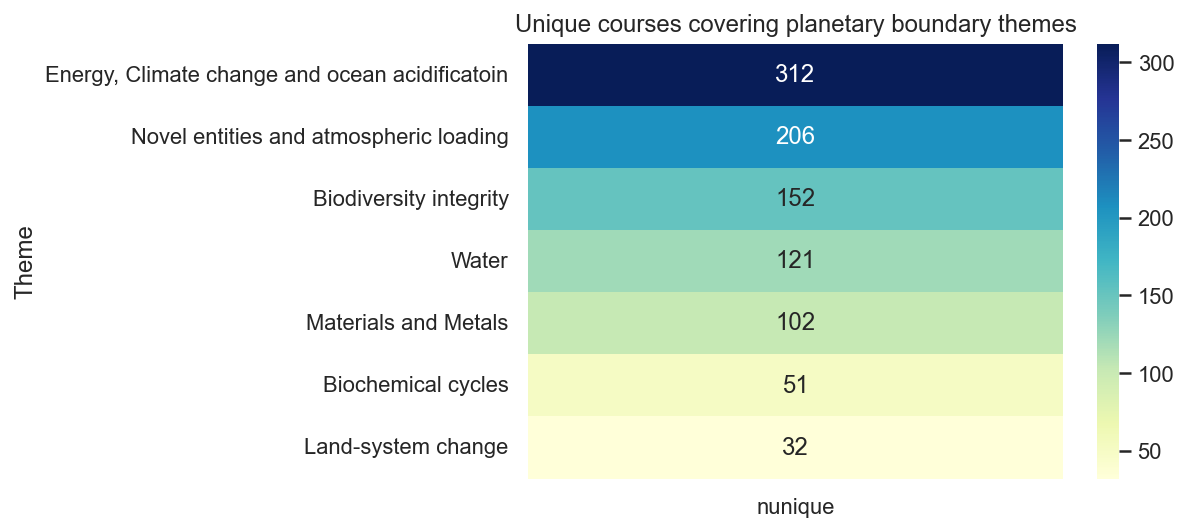

In [61]:
ax = sns.heatmap(countcourses.loc[planetary_boundaries].sort_values(by="nunique", ascending=False), annot=True,
                 cmap="YlGnBu", annot_kws={"size": 12}, fmt='d');  #, cbar_kws = dict(use_gridspec=False,location="top")
ax.set_title('Unique courses covering planetary boundary themes');

### 3.4.2 Unique courses per Social foundations, perspectives and sectorial approaches

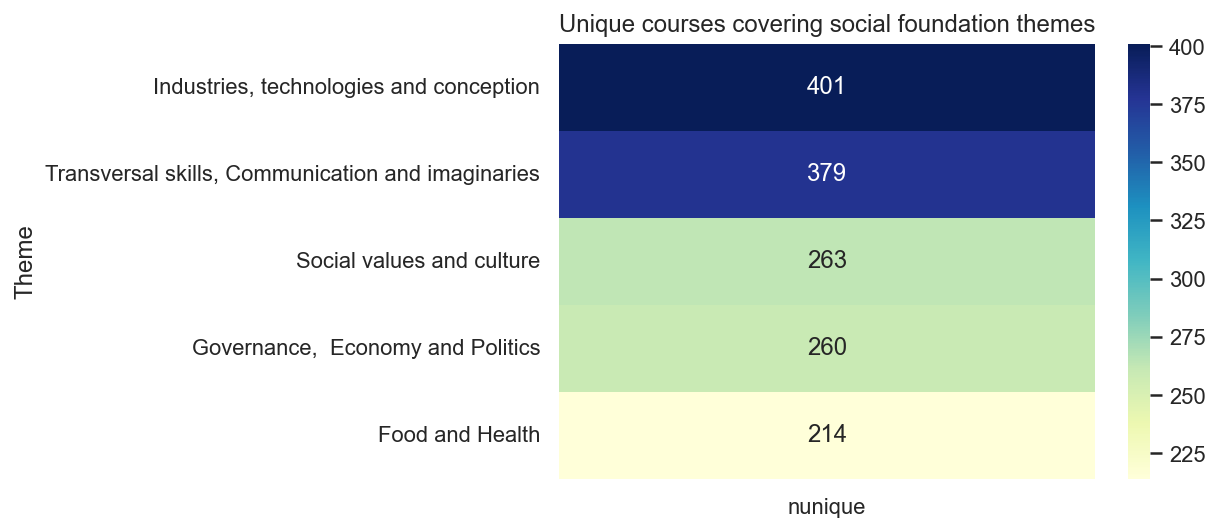

In [62]:
ax = sns.heatmap(countcourses.loc[social_foundations].sort_values(by="nunique", ascending=False), annot=True,
                 cmap="YlGnBu", annot_kws={"size": 12}, fmt='d');  #, cbar_kws = dict(use_gridspec=False,location="top")
ax.set_title('Unique courses covering social foundation themes');

### 3.4.3 Distribution of unique concepts by course and by Theme

In [76]:
grouped = data.groupby(['CourseCode', 'SubjectName']).agg(['unique', 'nunique'])['PageTitle'].sort_values(by="nunique",
                                                                                                          ascending=False).reset_index().set_index(
    'CourseCode')
px.bar(grouped, y='nunique', hover_data=['SubjectName', 'unique'],
       title='Overall distribution of unique concepts by course')


In [109]:
px.bar(data.groupby('CourseCode').agg(['nunique'])['PageTitle'].groupby('nunique')['nunique'].count(), title='Number of courses with n concepts')

#.groupby(['nunique, CourseCode', 'SubjectName']).count()


In [78]:
grouped = data.groupby(['CourseCode', 'SubjectName']).agg(['nunique'])['PageTitle'].sort_values(by="nunique",
                                                                                                ascending=False).reset_index().set_index(
    'CourseCode')
px.bar(grouped, y='nunique', hover_data=['nunique'],
       title='Overall distribution of unique concepts by course')


In [72]:
boundaries_data = categorical_data[categorical_data["Categories"] == 'Planetary boundaries']

boundaries_data = boundaries_data.groupby(['CourseCode', 'Theme', 'SubjectName']).agg(['unique', 'nunique'])[
    'PageTitle'].sort_values(by="nunique", ascending=False).reset_index().set_index('CourseCode')

fig = px.bar(boundaries_data, y='nunique', facet_col='Theme', facet_col_wrap=2, hover_data=['SubjectName', 'unique'],
             title='Distribution of unique concepts by course, for platenary boundary themes', height=800)

fig.update_xaxes(matches=None)
fig.update_yaxes(matches=None)
fig.show()
fig.write_html("Output/graphs/planetary_boundaries_concepts_distribution.html")


In [50]:
foundations_data = categorical_data[
    categorical_data["Categories"] == 'Social foundations, perspectives and sectorial approaches']
foundations_data = foundations_data.groupby(['CourseCode', 'Theme', 'SubjectName']).agg(['unique', 'nunique'])[
    'PageTitle'].sort_values(by="nunique", ascending=False).reset_index().set_index('CourseCode')

fig = px.bar(foundations_data, y='nunique', facet_col='Theme', facet_col_wrap=2, hover_data=['SubjectName', 'unique'],
             title='Distribution of unique concepts by course, for platenary boundary themes', height=800)

fig.update_xaxes(matches=None)
fig.update_yaxes(matches=None)
fig.show()


In [51]:
categorical_data.groupby(['FacultyCode', 'CourseCode']).agg(['nunique'])['PageTitle'].sort_values(by="nunique",
                                                                                                  ascending=False).groupby(
    'FacultyCode').sum()

nunique
FacultyCode         
STI              923
SB               686
IC               236
ENAC            1923
SV               331
CDH              113
CDM              435

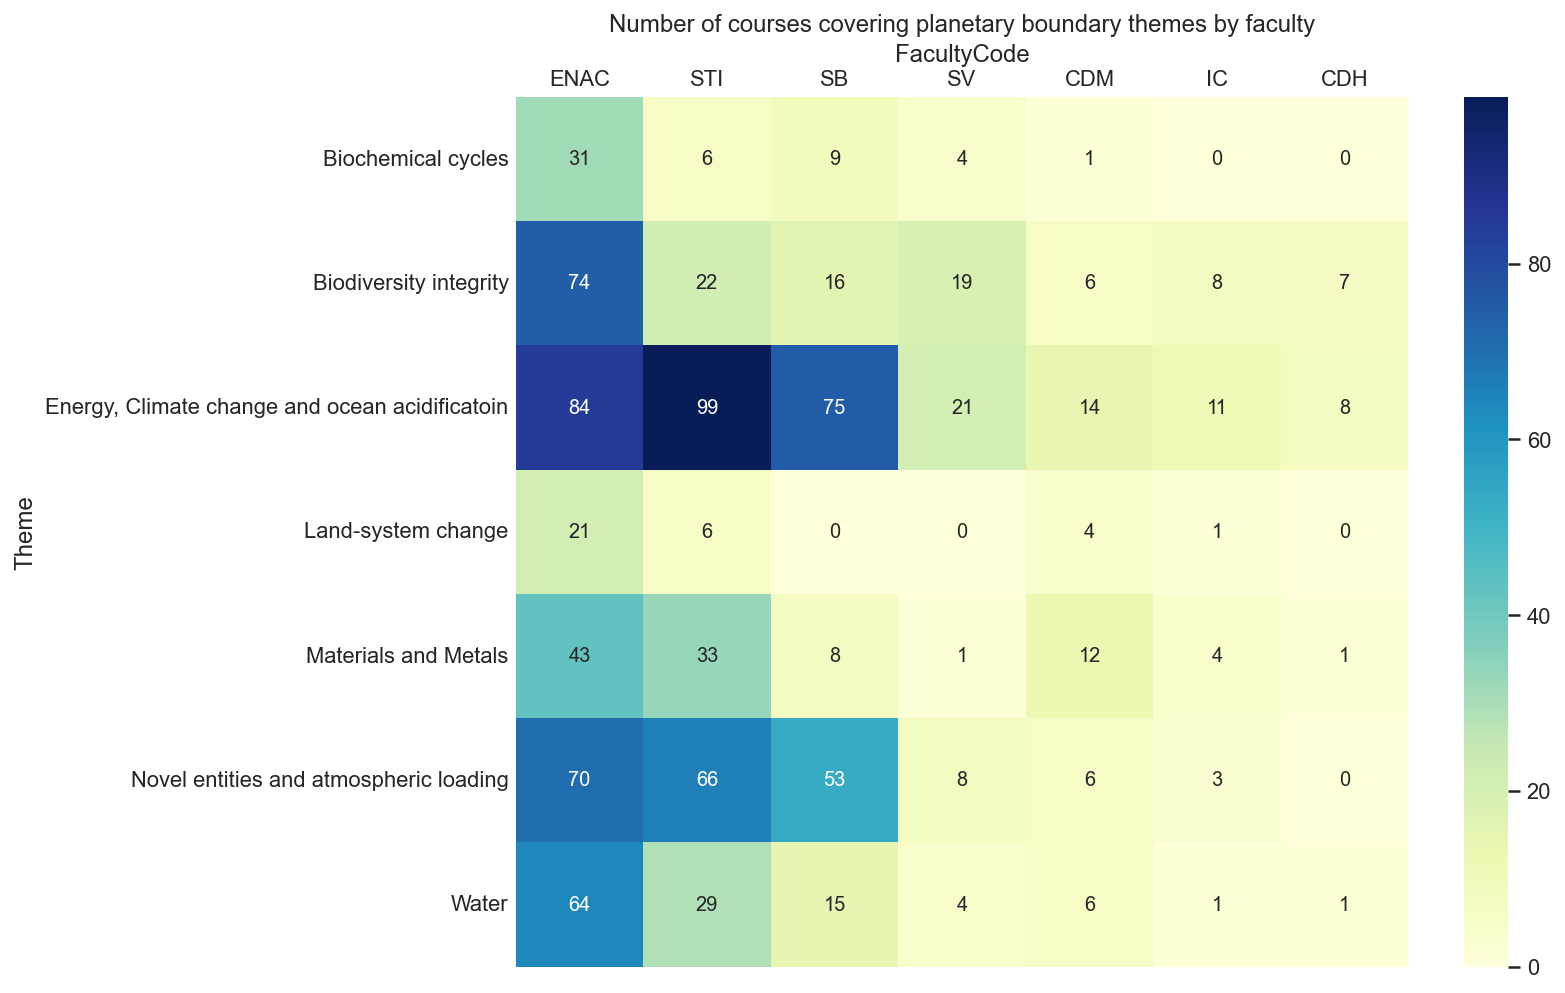

In [65]:
boundaries_data = categorical_data[categorical_data["Theme"].isin(planetary_boundaries)]
ct_courses_boundaries = pd.crosstab(index=boundaries_data['FacultyCode'],
                                    columns=boundaries_data['Theme'],
                                    values=boundaries_data['CourseCode'], aggfunc="nunique",
                                    dropna=False, margins=True)

ct_courses_boundaries = ct_courses_boundaries.loc[ct_courses_boundaries.mean(axis=1).sort_values(ascending=False).index]
ct_courses_boundaries.drop('All', inplace=True)
ct_courses_boundaries.drop('All', axis=1, inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax = sns.heatmap(ct_courses_boundaries.T, annot=True, cmap="YlGnBu", annot_kws={"size": 10},
                 fmt='g');  #, vmax=40, cbar_kws = dict(use_gridspec=False,location="top")

ax.set_title('Number of courses covering planetary boundary themes by faculty');
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.tick_params(axis=u'both', which=u'both', length=0)

plt.show()

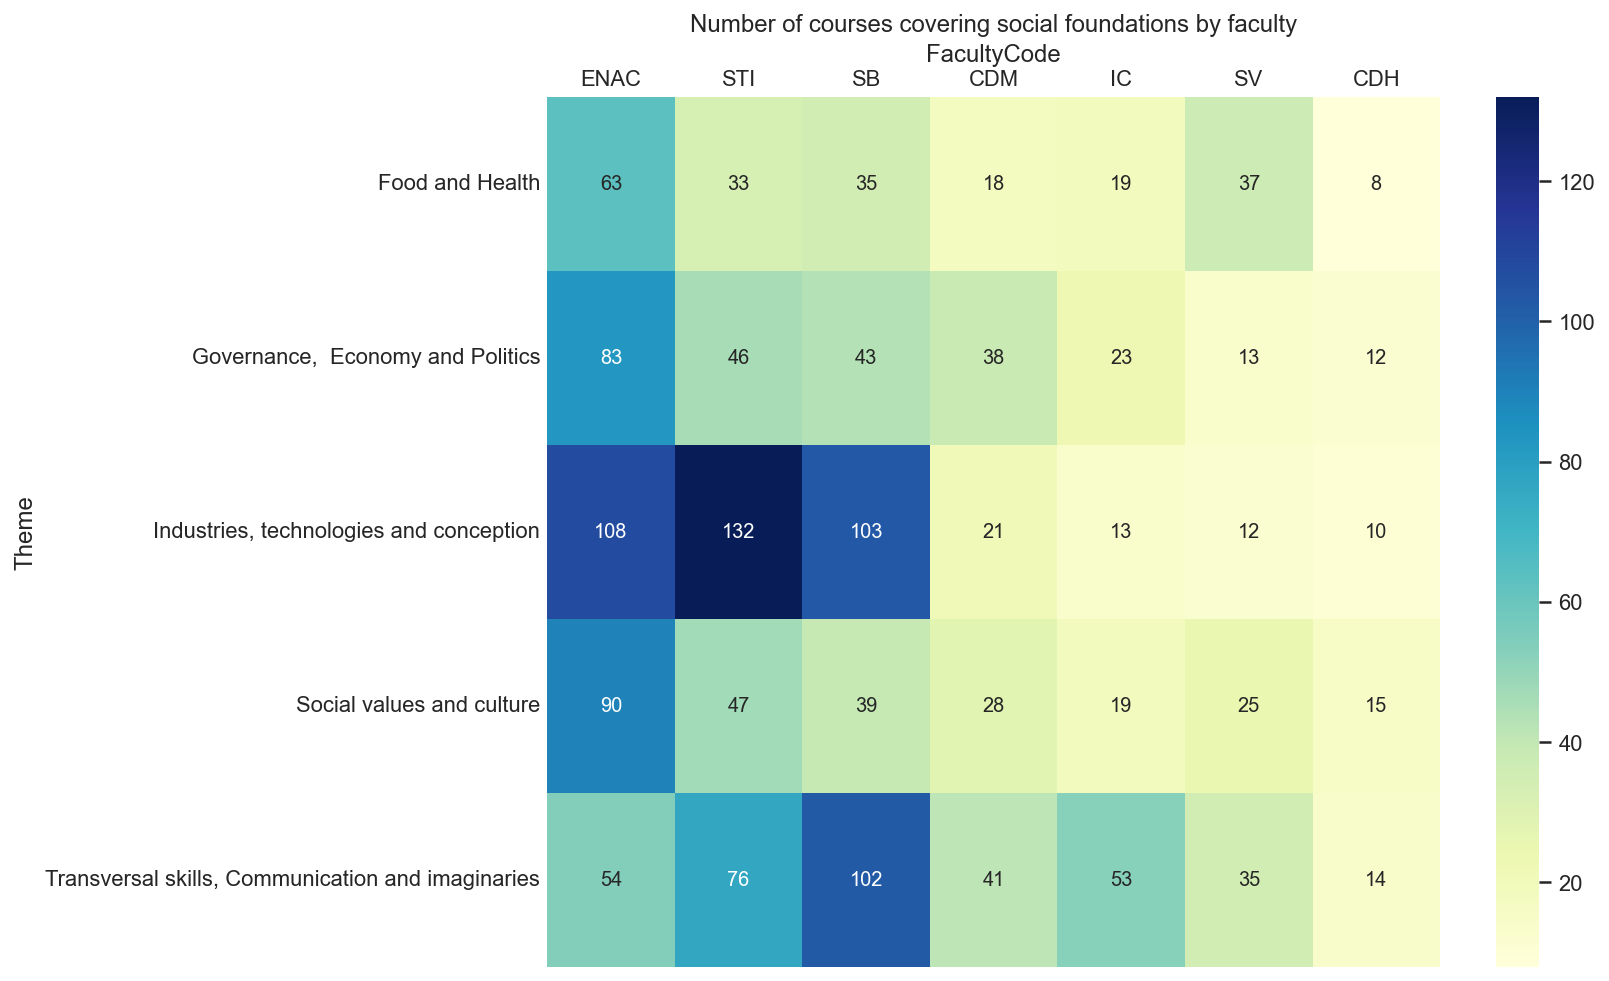

In [64]:

social_foundations_data = categorical_data[categorical_data["Theme"].isin(social_foundations)]
ct_courses_foundations = pd.crosstab(index=social_foundations_data['FacultyCode'],
                                     columns=social_foundations_data['Theme'],
                                     values=social_foundations_data['CourseCode'], aggfunc="nunique",
                                     dropna=False, margins=True)

ct_courses_foundations = ct_courses_foundations.loc[
    ct_courses_foundations.mean(axis=1).sort_values(ascending=False).index]
ct_courses_foundations.drop('All', inplace=True)
ct_courses_foundations.drop('All', axis=1, inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax = sns.heatmap(ct_courses_foundations.T, annot=True, cmap="YlGnBu", annot_kws={"size": 10},
                 fmt='g');  #, vmax=40, cbar_kws = dict(use_gridspec=False,location="top")

ax.set_title('Number of courses covering social foundations by faculty')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.tick_params(axis=u'both', which=u'both', length=0)

plt.show()